In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Ride_Fare/train.csv',index_col='tripid',)

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct


In [ ]:
num_rows=X_train.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(X_train.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(X_train.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

X_train['duration'] = duration_list


In [ ]:
X_train = X_train.drop('drop_time',axis = 1)
X_train = X_train.drop('pickup_time',axis = 1)

In [ ]:
'''
X_train = X_train.drop('pick_lat',axis = 1)
X_train = X_train.drop('pick_lon',axis = 1)
X_train = X_train.drop('drop_lat',axis = 1)
X_train = X_train.drop('drop_lon',axis = 1)
X_train = X_train.drop('meter_waiting_fare',axis = 1)


'''


In [ ]:
X_train.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189123628,10.5,840,56.0,0.0000,64.0,270.32,correct
189125358,10.5,780,47.0,0.0000,134.0,197.85,correct
189125719,10.5,1080,80.0,0.0000,61.0,301.64,correct
189127273,10.5,600,271.0,15.6638,68.0,82.30,correct
189128020,NaN,1020,NaN,NaN,NaN,358.39,correct


In [ ]:
X_train['label'].unique()

array(['correct', 'incorrect'], dtype=object)

In [ ]:
X_train['label'] = X_train['label'].replace({'correct':1 , 'incorrect':0})

In [ ]:
#X_train = X_train.fillna(X_train.mean())

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189123628,10.500000,840,56.000000,0.000000,64.000000,270.32,1
189125358,10.500000,780,47.000000,0.000000,134.000000,197.85,1
189125719,10.500000,1080,80.000000,0.000000,61.000000,301.64,1
189127273,10.500000,600,271.000000,15.663800,68.000000,82.30,1
189128020,13.719651,1020,629.074231,32.057666,112.466832,358.39,1
...,...,...,...,...,...,...,...
213803193,10.500000,840,93.000000,5.421900,451.000000,198.26,1
213812756,10.500000,2160,428.000000,0.000000,39.000000,581.23,1
213813930,10.500000,240,9.000000,0.000000,110.000000,76.20,1


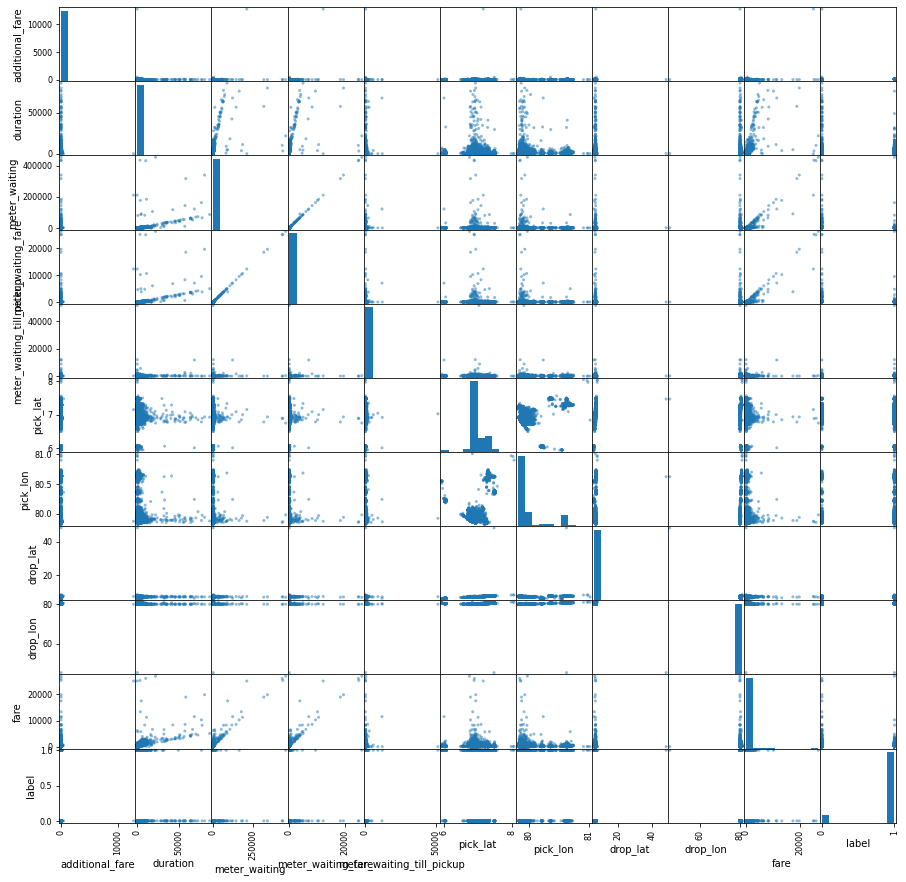

In [ ]:
# scatter plot matrix
scatter_matrix(X_train,figsize=(15, 15))
pyplot.show()

In [ ]:
corrMatrix = X_train.corr()
corrMatrix

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
additional_fare,1.000000,-0.000649,0.197605,0.199604,0.002355,0.009124,0.000621,0.004644,0.001539,0.315285,-0.040910
duration,-0.000649,1.000000,0.468704,0.467759,0.062765,-0.045228,-0.052146,-0.022170,-0.026661,0.582714,-0.165912
meter_waiting,0.197605,0.468704,1.000000,0.999474,0.030447,-0.016171,-0.014211,-0.010117,-0.007905,0.870126,-0.107266
meter_waiting_fare,0.199604,0.467759,0.999474,1.000000,0.029908,-0.015014,-0.012483,-0.009430,-0.006805,0.865073,-0.103319
meter_waiting_till_pickup,0.002355,0.062765,0.030447,0.029908,1.000000,0.011393,0.016509,0.006949,0.011065,0.045468,-0.035320
pick_lat,0.009124,-0.045228,-0.016171,-0.015014,0.011393,1.000000,0.522473,0.560466,0.340161,-0.024556,-0.029237
pick_lon,0.000621,-0.052146,-0.014211,-0.012483,0.016509,0.522473,1.000000,0.307313,0.654917,-0.035237,-0.037713
drop_lat,0.004644,-0.022170,-0.010117,-0.009430,0.006949,0.560466,0.307313,1.000000,-0.414566,-0.015530,-0.012781
drop_lon,0.001539,-0.026661,-0.007905,-0.006805,0.011065,0.340161,0.654917,-0.414566,1.000000,-0.014912,-0.030347
fare,0.315285,0.582714,0.870126,0.865073,0.045468,-0.024556,-0.035237,-0.015530,-0.014912,1.000000,-0.183336


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   17176 non-null  int64  
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   fare                       17039 non-null  float64
 6   label                      17176 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
X_train = X_train.drop('pick_lat',axis = 1)
X_train = X_train.drop('pick_lon',axis = 1)
X_train = X_train.drop('drop_lat',axis = 1)
X_train = X_train.drop('drop_lon',axis = 1)
X_train = X_train.drop('meter_waiting_fare',axis = 1)


In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_till_pickup,fare,label
tripid,,,,,,
189123628,10.5,840,56.0,64.0,270.32,1
189125358,10.5,780,47.0,134.0,197.85,1
189125719,10.5,1080,80.0,61.0,301.64,1
189127273,10.5,600,271.0,68.0,82.30,1
189128020,NaN,1020,NaN,NaN,358.39,1
...,...,...,...,...,...,...
213803193,10.5,840,93.0,451.0,198.26,1
213812756,10.5,2160,428.0,39.0,581.23,1
213813930,10.5,240,9.0,110.0,76.20,1


In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_till_pickup,fare,label
tripid,,,,,,
189123628,10.500000,840,56.000000,64.000000,270.32,1
189125358,10.500000,780,47.000000,134.000000,197.85,1
189125719,10.500000,1080,80.000000,61.000000,301.64,1
189127273,10.500000,600,271.000000,68.000000,82.30,1
189128020,13.719651,1020,629.074231,112.466832,358.39,1
...,...,...,...,...,...,...
213803193,10.500000,840,93.000000,451.000000,198.26,1
213812756,10.500000,2160,428.000000,39.000000,581.23,1
213813930,10.500000,240,9.000000,110.000000,76.20,1


In [ ]:
Y = X_train['label']


In [ ]:
X = X_train.drop('label',axis=1)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
weights = {0:5,1:1}

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Spot Check Algorithms
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


models = []
models.append(('LR', LogisticRegression(solver='liblinear',penalty='l2',class_weight=weights)))
models.append(('LDA', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(weights='distance')))
models.append(('CART', DecisionTreeClassifier(class_weight=weights)))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(class_weight=weights)))
models.append(('RF', RandomForestClassifier(class_weight=weights)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=make_scorer(f1_score,average='macro'))
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.594037 (0.017624)
LDA: 0.527899 (0.012273)
KNN: 0.807632 (0.018638)
CART: 0.759853 (0.016773)
NB: 0.569840 (0.020400)
RF: 0.810668 (0.018808)


In [ ]:
  
  '''
	print('%s: %f (%f)' % (name, np.mean(), cv_results.std()))
  '''

In [ ]:
#### train RF with all data done

In [ ]:
model = RandomForestClassifier(class_weight=weights)
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 5, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
########### test data

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/Ride_Fare/test.csv',index_col="tripid")

In [ ]:
num_rows=test_df.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(test_df.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(test_df.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

test_df['duration'] = duration_list


In [ ]:
test_df = test_df.drop('drop_time',axis = 1)
test_df = test_df.drop('pickup_time',axis = 1)

In [ ]:
test_df = test_df.drop('pick_lat',axis = 1)
test_df = test_df.drop('pick_lon',axis = 1)
test_df = test_df.drop('drop_lat',axis = 1)
test_df = test_df.drop('drop_lon',axis = 1)
#test_df = test_df.drop('meter_waiting_fare',axis = 1)

In [ ]:
#scaler = MinMaxScaler()

#scaler.fit(test_df)

test_df = scaler.transform(test_df)

In [ ]:
### NN
test_preds = model.predict(test_df)

In [ ]:
test_preds

array([[0.98648214],
       [0.8256606 ],
       [0.97676206],
       ...,
       [0.99306947],
       [0.9851118 ],
       [0.96432066]], dtype=float32)

In [ ]:
preds=[]
for pred in test_preds:
  if pred >= 0.5:
    preds.append(1)
  else:
    preds.append(0)  

In [ ]:
preds

In [ ]:
submission_df = pd.read_csv('/content/drive/My Drive/Ride_Fare/sample_submission.csv',index_col="tripid")
submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,0
213294622,1
213298687,1


In [ ]:
# Make sure we have the rows in the same order
'''
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)
'''
# Save predictions to submission data frame
submission_df["prediction"] = preds

submission_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [ ]:
submission_df.to_csv('/content/drive/My Drive/Ride_Fare/ride_fare_submission.csv', index=True)

In [ ]:
submission_df

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [ ]:
submission_df['prediction'].value_counts()

1    8204
0     372
Name: prediction, dtype: int64

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189123628,10.5,840,56.0,0.0000,64.0,270.32,1
189125358,10.5,780,47.0,0.0000,134.0,197.85,1
189125719,10.5,1080,80.0,0.0000,61.0,301.64,1
189127273,10.5,600,271.0,15.6638,68.0,82.30,1
189128020,NaN,1020,NaN,NaN,NaN,358.39,1
...,...,...,...,...,...,...,...
213803193,10.5,840,93.0,5.4219,451.0,198.26,1
213812756,10.5,2160,428.0,0.0000,39.0,581.23,1
213813930,10.5,240,9.0,0.0000,110.0,76.20,1


In [ ]:
X_train['label'].value_counts()

1    15495
0     1681
Name: label, dtype: int64

In [ ]:
X_train = X_train.sample(frac=1)

In [ ]:
X_train_0 = X_train.loc[X_train['label'] == 0]
X_train_1 = X_train.loc[X_train['label'] == 1]

  #fill na with mean
X_train_0 = X_train_0.fillna(X_train_0.mean())
X_train_1 = X_train_1.fillna(X_train_1.mean())

X = pd.concat([X_train_0,X_train_1],axis = 0)
X = X.drop('label',axis=1)


In [ ]:
Y = X_train['label']

In [ ]:
from imblearn.combine import SMOTETomek

smk=SMOTETomek(random_state=42,sampling_strategy=1)
x_res,y_res=smk.fit_resample(X,Y)
print('x shape',x_res.shape)
print('y shape',y_res.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


x shape (29718, 6)
y shape (29718,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scaler = StandardScaler()

scaler.fit(x_res)

x_res = scaler.transform(x_res)


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)

X = scaler.transform(X)

In [ ]:
weights = {0:2,1:1}

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',penalty='l2',class_weight=weights)))
models.append(('LDA', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(weights='distance')))
models.append(('CART', DecisionTreeClassifier(class_weight=weights)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(class_weight=weights)))
models.append(('RF', RandomForestClassifier(class_weight=weights)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.902131 (0.000169)
LDA: 0.902131 (0.000169)
KNN: 0.887226 (0.002599)
CART: 0.816197 (0.006291)
NB: 0.144969 (0.006327)
SVM: 0.901898 (0.000383)
RF: 0.900093 (0.000897)


In [ ]:
###################################3

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   17176 non-null  int64  
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   fare                       17039 non-null  float64
 6   label                      17176 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
s = X_train[X_train.isna().any(axis=1)]
s

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189128020,NaN,1020,NaN,NaN,NaN,358.39,1
189157607,10.5,2460,1686.0,97.4508,29.0,NaN,0
189164806,10.5,780,2689.0,146.9854,69.0,NaN,0
189164831,NaN,480,NaN,NaN,NaN,NaN,0
189231599,NaN,900,NaN,NaN,NaN,196.50,0
...,...,...,...,...,...,...,...
213449192,NaN,780,NaN,NaN,NaN,NaN,0
213510465,NaN,60,NaN,NaN,NaN,NaN,0
213538831,NaN,4560,NaN,NaN,NaN,NaN,0


In [ ]:
s.loc[s['label']==0]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189157607,10.5,2460,1686.0,97.4508,29.0,NaN,0
189164806,10.5,780,2689.0,146.9854,69.0,NaN,0
189164831,NaN,480,NaN,NaN,NaN,NaN,0
189231599,NaN,900,NaN,NaN,NaN,196.50,0
189393356,NaN,1560,NaN,NaN,NaN,188.71,0
...,...,...,...,...,...,...,...
213449192,NaN,780,NaN,NaN,NaN,NaN,0
213510465,NaN,60,NaN,NaN,NaN,NaN,0
213538831,NaN,4560,NaN,NaN,NaN,NaN,0


In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189123628,10.500000,840,56.000000,0.000000,64.000000,270.32,1
189125358,10.500000,780,47.000000,0.000000,134.000000,197.85,1
189125719,10.500000,1080,80.000000,0.000000,61.000000,301.64,1
189127273,10.500000,600,271.000000,15.663800,68.000000,82.30,1
189128020,13.719651,1020,629.074231,32.057666,112.466832,358.39,1
...,...,...,...,...,...,...,...
213803193,10.500000,840,93.000000,5.421900,451.000000,198.26,1
213812756,10.500000,2160,428.000000,0.000000,39.000000,581.23,1
213813930,10.500000,240,9.000000,0.000000,110.000000,76.20,1


In [ ]:

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Ride_Fare/train.csv',index_col='tripid',)

In [ ]:
X_train

In [ ]:
num_rows=X_train.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(X_train.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(X_train.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

X_train['duration'] = duration_list


In [ ]:
X_train.drop('drop_time',axis = 1,inplace=True)
X_train.drop('pickup_time',axis = 1,inplace=True)

In [ ]:
X_train

In [ ]:
X_train.drop('pick_lat',axis = 1,inplace=True)
X_train.drop('pick_lon',axis = 1,inplace=True)
X_train.drop('drop_lat',axis = 1,inplace=True)
X_train.drop('drop_lon',axis = 1,inplace=True)


#X_train = X_train.drop('meter_waiting_fare',axis = 1)


In [ ]:
X_train

In [ ]:
X_train['label'] = X_train['label'].replace({'correct':1 , 'incorrect':0})

In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
def split_train_val(X_train):
  X_train_0 = X_train.loc[X_train['label'] == 0]
  X_train_1 = X_train.loc[X_train['label'] == 1]



  val_0 = X_train_0.sample(n=250,random_state=1)
  train_0 = X_train_0.drop(val_0.index)

  val_1 = X_train_1.sample(n=250,random_state=1)
  train_1 = X_train_1.drop(val_1.index)

  validation_set = pd.concat([val_0,val_1],axis=0)
  validation_set = validation_set.sample(frac=1)

  train_set = pd.concat([train_0,train_1],axis=0)
  train_set = train_set.sample(frac=1)

  train_set_y = train_set['label']
  train_set_x = train_set.drop('label', axis=1)

  validation_set_y = validation_set['label']
  validation_set_x = validation_set.drop('label', axis=1)

  return train_set_x, train_set_y,validation_set_x, validation_set_y

In [ ]:
train_set_x, train_set_y,validation_set_x, validation_set_y = split_train_val(X_train)

In [ ]:
(validation_set_y==1).sum()

250

In [ ]:
scaler = StandardScaler()
scaler.fit(train_set_x)

scaled_train_x = scaler.transform(train_set_x)
scaled_validation_x = scaler.transform(validation_set_x)

In [ ]:
##################################################################################33

In [ ]:
X_train, Y_train = X , X_train['label']

In [ ]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)

X = scaler.transform(X)


In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',penalty='l2',class_weight='balanced')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(class_weight='balanced')))
models.append(('RF', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.422971 (0.068386)
LDA: 0.902073 (0.000136)
KNN: 0.895436 (0.002050)
CART: 0.807872 (0.003127)
NB: 0.807715 (0.160478)
SVM: 0.586686 (0.190813)
RF: 0.899162 (0.001172)


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier())

y_train = train_set_y
X_train = scaled_train_x

#Train the classifier.
bbc.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                class_weight=None,
                                                                criterion='gini',
                                                                max_depth=None,
                                                                max_features='auto',
                                                                max_leaf_nodes=None,
                                                                max_samples=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                                min_samples_spli

In [ ]:
preds


array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(validation_set_y, preds, average='macro')
f1

0.7646795234629795

In [ ]:
confusion_mat = confusion_matrix(validation_set_y, preds)
confusion_mat

array([[ 264,   72],
       [ 294, 2805]])

In [ ]:
##############      NN

In [ ]:
Full_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,
210652569,30.5,360,79.0,4.6057,14.0,7.29125,80.6192,7.28438,80.6242,110.22,1
191425016,10.5,2220,50.0,0.0000,1539.0,5.94957,80.5507,5.96761,80.3987,775.80,1
205352789,10.5,4500,269.0,0.3468,165.0,6.78494,79.8956,6.95289,79.9325,1078.41,1
208183333,5.0,2040,488.0,28.4504,0.0,6.91423,79.8783,6.95534,79.9205,461.49,1
196495407,10.5,120,0.0,0.0000,4.0,6.90655,79.9462,6.90715,79.9443,71.42,1
...,...,...,...,...,...,...,...,...,...,...,...
204020794,10.5,1620,740.0,43.1420,128.0,6.84067,79.8820,6.86364,79.8927,245.72,1
207677755,10.5,1140,232.0,0.0000,103.0,7.00034,79.9483,7.05068,79.9613,251.59,1
197524048,10.5,4380,767.0,44.3326,33.0,6.85391,79.9828,6.90010,79.8596,791.61,1


In [ ]:
y = Full_df['label']

In [ ]:
X = Full_df.drop('label',axis=1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

scaled_train_x = scaler.transform(X)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
'''
scaled_train_x = scaler.transform(train_set_x)
scaled_validation_x = scaler.transform(validation_set_x)

train_set_x, train_set_y,validation_set_x, validation_set_y = split_train_val(X_train)
'''

In [ ]:
weights = {0:2,1:1}

In [ ]:
X_train

In [ ]:
# fit the keras model on the dataset
history = model.fit(scaled_train_x, train_set_y, epochs=12, batch_size=10,validation_split=0.33,class_weight=weights)

Train on 11170 samples, validate on 5503 samples
Epoch 1/12
11170/11170 [==============================] - 2s 193us/step - loss: 0.4371 - accuracy: 0.9176 - val_loss: 0.4089 - val_accuracy: 0.9137
Epoch 2/12
11170/11170 [==============================] - 2s 170us/step - loss: 0.3761 - accuracy: 0.9181 - val_loss: 0.3689 - val_accuracy: 0.9155
Epoch 3/12
11170/11170 [==============================] - 2s 171us/step - loss: 0.3441 - accuracy: 0.9299 - val_loss: 0.3431 - val_accuracy: 0.9313
Epoch 4/12
11170/11170 [==============================] - 2s 171us/step - loss: 0.3178 - accuracy: 0.9394 - val_loss: 0.3184 - val_accuracy: 0.9379
Epoch 5/12
11170/11170 [==============================] - 2s 169us/step - loss: 0.2993 - accuracy: 0.9432 - val_loss: 0.3150 - val_accuracy: 0.9409
Epoch 6/12
11170/11170 [==============================] - 2s 171us/step - loss: 0.2839 - accuracy: 0.9449 - val_loss: 0.2899 - val_accuracy: 0.9406
Epoch 7/12
11170/11170 [==============================] - 2s 17

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


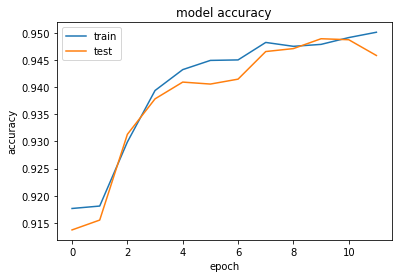

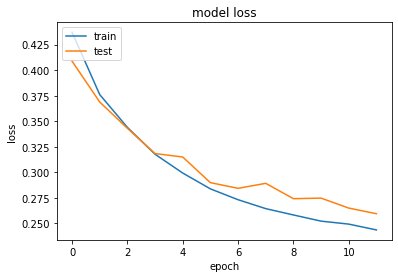

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(scaled_validation_x)

In [ ]:
preds

In [ ]:
class_preds=[]
for pred in preds:
  if pred>0.65:
    class_preds.append(1)
  else:
    class_preds.append(0)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(validation_set_y, class_preds, average='macro')
f1

0.8179028132992328

In [ ]:
confusion_mat = confusion_matrix(validation_set_y, class_preds)
confusion_mat

array([[168,  82],
       [  7, 243]])

In [ ]:
import pickle
filename = '/content/drive/My Drive/Ride_Fare/model_81.pkl'
outfile = open(filename,'wb')

pickle.dump(model,outfile)

In [ ]:
infile = open('/content/drive/My Drive/Ride_Fare/model_81.pkl','rb')
model = pickle.load(infile)

EOFError: ignored

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Ride_Fare/train.csv',index_col='tripid',)

In [ ]:
X_train

In [ ]:
num_rows=X_train.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(X_train.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(X_train.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

X_train['duration'] = duration_list


In [ ]:
X_train.drop('drop_time',axis = 1,inplace=True)
X_train.drop('pickup_time',axis = 1,inplace=True)

In [ ]:
X_train

In [ ]:
X_train.drop('pick_lat',axis = 1,inplace=True)
X_train.drop('pick_lon',axis = 1,inplace=True)
X_train.drop('drop_lat',axis = 1,inplace=True)
X_train.drop('drop_lon',axis = 1,inplace=True)


#X_train = X_train.drop('meter_waiting_fare',axis = 1)


In [ ]:
X_train

In [ ]:
X_train['label'] = X_train['label'].replace({'correct':1 , 'incorrect':0})

In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
Y = X_train['label']
X = X_train.drop('label',axis=1)

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
'''
scaled_train_x = scaler.transform(train_set_x)
scaled_validation_x = scaler.transform(validation_set_x)

train_set_x, train_set_y,validation_set_x, validation_set_y = split_train_val(X_train)
'''

In [ ]:
weights = {0:2,1:1}

In [ ]:
# fit the keras model on the dataset
history = model.fit(X, Y, epochs=30, batch_size=10,validation_split=0.33,class_weight=weights)

Train on 11507 samples, validate on 5669 samples
Epoch 1/30
11507/11507 [==============================] - 2s 186us/step - loss: 11.8666 - accuracy: 0.8030 - val_loss: 3.5233 - val_accuracy: 0.9259
Epoch 2/30
11507/11507 [==============================] - 2s 169us/step - loss: 3.5253 - accuracy: 0.8734 - val_loss: 1.2040 - val_accuracy: 0.9215
Epoch 3/30
11507/11507 [==============================] - 2s 169us/step - loss: 0.8246 - accuracy: 0.8988 - val_loss: 0.4683 - val_accuracy: 0.9212
Epoch 4/30
11507/11507 [==============================] - 2s 165us/step - loss: 0.6487 - accuracy: 0.9007 - val_loss: 0.4751 - val_accuracy: 0.9215
Epoch 5/30
11507/11507 [==============================] - 2s 168us/step - loss: 0.5457 - accuracy: 0.9017 - val_loss: 0.4549 - val_accuracy: 0.9220
Epoch 6/30
11507/11507 [==============================] - 2s 167us/step - loss: 0.5000 - accuracy: 0.9065 - val_loss: 0.4529 - val_accuracy: 0.9220
Epoch 7/30
11507/11507 [==============================] - 2s 1

In [ ]:
############################ AUGMENTATION ###########################

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Ride_Fare/train.csv',index_col='tripid',)

In [ ]:
X_train

In [ ]:
num_rows=X_train.shape[0]
duration_list = []
for i in range(num_rows):
  duration = (datetime.strptime(X_train.iloc[i]['drop_time'],'%m/%d/%Y %H:%M')- datetime.strptime(X_train.iloc[i]['pickup_time'],'%m/%d/%Y %H:%M')).seconds
  duration_list.append(duration)

X_train['duration'] = duration_list


In [ ]:
X_train = X_train.drop('drop_time',axis = 1)
X_train = X_train.drop('pickup_time',axis = 1)

In [ ]:
X_train = X_train.drop('pick_lat',axis = 1)
X_train = X_train.drop('pick_lon',axis = 1)
X_train = X_train.drop('drop_lat',axis = 1)
X_train = X_train.drop('drop_lon',axis = 1)

In [ ]:
X_train['label'] = X_train['label'].replace({'correct':1 , 'incorrect':0})

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
tripid,,,,,,,
189123628,10.5,840,56.0,0.0000,64.0,270.32,1
189125358,10.5,780,47.0,0.0000,134.0,197.85,1
189125719,10.5,1080,80.0,0.0000,61.0,301.64,1
189127273,10.5,600,271.0,15.6638,68.0,82.30,1
189128020,NaN,1020,NaN,NaN,NaN,358.39,1
...,...,...,...,...,...,...,...
213803193,10.5,840,93.0,5.4219,451.0,198.26,1
213812756,10.5,2160,428.0,0.0000,39.0,581.23,1
213813930,10.5,240,9.0,0.0000,110.0,76.20,1


In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
X_train_cols = X_train.columns
X_train_cols

Index(['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'fare', 'label'],
      dtype='object')

In [ ]:
X_train['label'].value_counts()

1    15495
0     1681
Name: label, dtype: int64

In [ ]:
def split_train_test(X_train,num):
  X_train_0 = X_train.loc[X_train['label'] == 0]
  X_train_1 = X_train.loc[X_train['label'] == 1]


  val_0 = X_train_0.sample(n=num ,random_state=1)
  train_0 = X_train_0.drop(val_0.index)

  val_1 = X_train_1.sample(n=num,random_state=1)
  train_1 = X_train_1.drop(val_1.index)

  validation_set = pd.concat([val_0,val_1],axis=0)
  validation_set = validation_set.sample(frac=1)

  train_set = pd.concat([train_0,train_1],axis=0)
  train_set = train_set.sample(frac=1)

  train_set_y = train_set['label']
  train_set_x = train_set.drop('label', axis=1)

  validation_set_y = validation_set['label']
  validation_set_x = validation_set.drop('label', axis=1)

  return train_set_x, train_set_y,validation_set_x, validation_set_y

In [ ]:
train_x, train_y,test_x, test_y = split_train_test(X_train,200)

In [ ]:
from imblearn.combine import SMOTETomek


smk=SMOTETomek(random_state=42,sampling_strategy=1.0)
x_res,y_res=smk.fit_resample(train_x,train_y)
print('x shape',x_res.shape)
print('y shape',y_res.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


x shape (30164, 6)
y shape (30164,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
res_x_pd = pd.DataFrame(x_res,columns=X_train_cols[:-1])

In [ ]:
res_x_pd

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare
0,10.500000,900.000000,143.000000,0.000000,81.000000,209.000000
1,10.500000,1140.000000,144.000000,8.395200,112.000000,183.410000
2,5.000000,240.000000,70.000000,4.081000,0.000000,72.000000
3,10.500000,60.000000,41.000000,0.000000,8.000000,60.500000
4,10.500000,300.000000,104.000000,6.063200,135.000000,75.580000
...,...,...,...,...,...,...
30159,10.500000,952.803762,59.362947,0.000000,75.244577,862.019614
30160,12.056220,600.000000,542.238791,15.495094,57.460814,333.830098
30161,13.719651,98.444174,629.074231,32.057666,112.466832,312.655466
30162,10.500000,780.000000,90.023446,0.771413,33.724101,365.839777


In [ ]:
res_y_pd = pd.DataFrame(y_res, columns = ['label'])

In [ ]:
res_full = pd.concat([res_x_pd,res_y_pd],axis = 1)

In [ ]:
res_full

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
0,10.500000,900.000000,143.000000,0.000000,81.000000,209.000000,1
1,10.500000,1140.000000,144.000000,8.395200,112.000000,183.410000,1
2,5.000000,240.000000,70.000000,4.081000,0.000000,72.000000,1
3,10.500000,60.000000,41.000000,0.000000,8.000000,60.500000,0
4,10.500000,300.000000,104.000000,6.063200,135.000000,75.580000,1
...,...,...,...,...,...,...,...
30159,10.500000,952.803762,59.362947,0.000000,75.244577,862.019614,0
30160,12.056220,600.000000,542.238791,15.495094,57.460814,333.830098,0
30161,13.719651,98.444174,629.074231,32.057666,112.466832,312.655466,0
30162,10.500000,780.000000,90.023446,0.771413,33.724101,365.839777,0


In [ ]:
train_set_x, train_set_y,validation_set_x, validation_set_y = split_train_val(res_full)

In [ ]:
scaler = StandardScaler()
scaler.fit(train_set_x)

scaled_train_x = scaler.transform(train_set_x)
scaled_validation_x = scaler.transform(validation_set_x)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

#Create an object of the classifier.
#bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=200))
model = XGBClassifier(subsample=0.8,random_state=2,colsample_bytree=0.7)
y_train = train_set_y
X_train = scaled_train_x

#Train the classifier.
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
preds = bbc.predict(scaled_validation_x)

In [ ]:
preds

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
class_preds=[]
for pred in preds:
  if pred>0.5:
    class_preds.append(1)
  else:
    class_preds.append(0)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(validation_set_y, class_preds, average='macro')
f1

0.9505954265611258

In [ ]:
confusion_mat = confusion_matrix(validation_set_y, class_preds)
confusion_mat

array([[2851,  165],
       [ 133, 2883]])

In [ ]:
validation_set_y.value_counts()

1    3016
0    3016
Name: label, dtype: int64

In [ ]:
################## for test set

In [ ]:
#test_x, test_y

In [ ]:
scaled_test_x = scaler.transform(test_x)

In [ ]:
test_preds = model.predict(scaled_test_x)

In [ ]:
test_preds

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
class_preds=[]
for pred in test_preds:
  if pred>0.5:
    class_preds.append(1)
  else:
    class_preds.append(0)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(test_y, class_preds, average='macro')
f1

0.7803825429658572

In [ ]:
confusion_mat = confusion_matrix(test_y, class_preds)
confusion_mat

array([[124,  76],
       [  7, 193]])

In [ ]:
test_y.value_counts()

1    3052
0    3052
Name: label, dtype: int64

In [ ]:
######################## NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(x= scaled_train_x, y=train_set_y, epochs=70, batch_size=10,)